# Data Exploration


In [11]:
import pandas as pd
import numpy as np


df = pd.read_csv('dfinal2.csv', delimiter = ';')

df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.000000,51.000000,8.0,322.0,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.190574,25.538934,8.3,138.0,E
2,2,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,68.190574,25.538934,8.3,138.0,E
3,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.000000,73.000000,8.3,709.0,E
4,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.000000,73.000000,8.0,192.0,E


In [12]:
#Checking the Shape of the Data
df.shape


(16730, 16)

In [14]:
# Checking for Duplicate Rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [15]:
#Checking Column Types and Memory Usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16730 non-null  int64  
 1   Name          16730 non-null  object 
 2   Platform      16730 non-null  object 
 3   Year          16730 non-null  float64
 4   Genre         16730 non-null  object 
 5   Publisher     16715 non-null  object 
 6   NA_Sales      16730 non-null  float64
 7   EU_Sales      16730 non-null  float64
 8   JP_Sales      16730 non-null  float64
 9   Other_Sales   16730 non-null  float64
 10  Global_Sales  16730 non-null  float64
 11  Critic_Score  16730 non-null  float64
 12  Critic_Count  16730 non-null  float64
 13  User_Score    16730 non-null  float64
 14  User_Count    16730 non-null  float64
 15  Rating        10688 non-null  object 
dtypes: float64(10), int64(1), object(5)
memory usage: 2.0+ MB


In [16]:
#Checking for Missing Values (NaNs)
df.isna().sum()


,0
Unnamed: 0,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,15
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Suite à l'appel de la methode isna(), nous remarquons que la dataset est quasiment propre, neanmoins nous observons quelque valeurs manquante dans la variable Publisher et Rating.
Nous allons verifier ça dans la suite du code

Following the call to the isna() method, we notice that the dataset is almost clean; however, there are some missing values in the Publisher and Rating variables. We will further investigate this in the next part of the code

In [17]:
# Checking Data Types of Columns
df.dtypes

,0
Unnamed: 0,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [18]:
#Checking Unique Values in the 'Publisher' Column
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Sony Computer Entertainment Europe', 'Bethesda Softworks',
       'Electronic Arts', 'Sega', 'SquareSoft', 'Namco Bandai Games',
       'Atari', '505 Games', 'Square Enix', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'LucasArts', 'Virgin Interactive',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'Eidos Interactive', 'RedOctane', 'Aspyr', 'Vivendi Games',
       'EA Tiburon', 'Enix Corporation', 'Success', 'Namco', 'Palcom',
       'Unknown', 'Parker Bros.', 'Hasbro Interactive', 'Valve Software',
       'THQ', 'Fox Interactive', 'Acclaim Entertainment', 'MTV Games',
       'Disney Interactive Studios', 'EA Sports', 'Coleco',
       'Majesco Entertainment', 'Codemasters', 'Arena Entertainment',
       'Red Orb', 'Psygnosis', 'Midway Games', 'Sunsoft', 'Level 5',
       'Rebellion', 'Taito', 

## split hold-out method


In [19]:
# Dropping Unnecessary columns
df.drop([ "Rating","Unnamed: 0"], axis=1, inplace=True)

Le dataset etait quasiment deja prêt à l'emploi car nous avons au préalable supprimé pas mal de colonne comme la colonne (Developper, Index) ... l'idée etait de faire pas beaucoup de preparation de donnée pour le machine learning car tout a etait fait en amont!

The dataset was almost ready for use, as we had removed several columns beforehand, including Developer and Index. The goal was to limit the amount of data preparation required for machine learning, as most of the preprocessing had already been completed.

In [21]:
# Update the dataset
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
16725,Transport Fever,"('PC',)",2016.0,Simulation,Astragon,0.00,0.03,0.00,0.00,0.04,70.0,11.0,7.0,28.0
16726,Until Dawn: Rush of Blood,"('PS4',)",2016.0,Adventure,Sony Computer Entertainment,0.18,0.15,0.00,0.07,0.39,72.0,49.0,8.0,68.0
16727,Watch Dogs 2,"('PS4',)",2016.0,Action,Ubisoft,0.37,0.58,0.00,0.18,1.13,83.0,88.0,7.8,621.0
16728,World of Final Fantasy,"('PS4',)",2016.0,Role-Playing,Square Enix,0.08,0.14,0.08,0.04,0.33,77.0,74.0,8.3,222.0
16729,WWE 2K17,"('PS4',)",2016.0,Sports,Take-Two Interactive,0.17,0.34,0.00,0.09,0.60,69.0,50.0,6.9,88.0


Nous observons aucune valeurs manquante dans la variable cibles qui est la variable Year. De ce fait pas besoin de gerer les NAN dans cette variable .

We observed no missing values in the target variable, Year. Therefore, there is no need to handle any NaN values for this variable.

In [23]:
# Splitting the Data: Hold-out Method
from sklearn.model_selection import train_test_split

target = df.drop('Global_Sales', axis = 1)
features = df['Global_Sales']

X_train,X_test, y_train,y_test = train_test_split(target,features, test_size = 0.3 , random_state = 42)

print("Train shape :",X_train.shape)
print("Test shape :",X_test.shape)

Train shape : (11711, 13)
Test shape : (5019, 13)


In [24]:
# Fill missing values with the mode
categorical_columns = ['Publisher']

for col in categorical_columns:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_train[col].mode()[0])

In [25]:
# Update NAN
X_train.isna().sum()

,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Critic_Score,0


Nous avons donc aucune valeur manquante dans le dataset, ni dans les variables features ni dans la variable target,
la suite sera de trouver la bonne methode de features engineering parce que nous avons enormement de colonnes et pas mal de variable categorielle avec des valeurs.

We have no missing values in the dataset, neither in the feature variables nor in the target variable. The next step will be to identify the appropriate feature engineering methods, as we have a large number of columns and several categorical variables with multiple values

## Vizualisation for Linear Regression



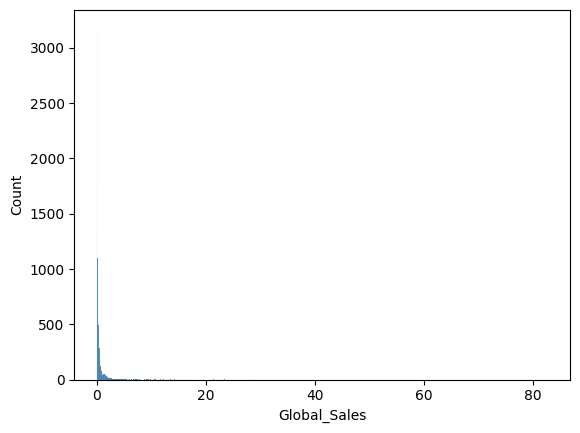

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the 'Global_Sales' variable

sns.histplot(df['Global_Sales'])
plt.show;

<ipython-input-27-85182a3454bd>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  data_viz.set_xticklabels(data_viz.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Year'),
 Text(1, 0, 'NA_Sales'),
 Text(2, 0, 'EU_Sales'),
 Text(3, 0, 'JP_Sales'),
 Text(4, 0, 'Other_Sales'),
 Text(5, 0, 'Global_Sales'),
 Text(6, 0, 'Critic_Score'),
 Text(7, 0, 'Critic_Count'),
 Text(8, 0, 'User_Score'),
 Text(9, 0, 'User_Count')]

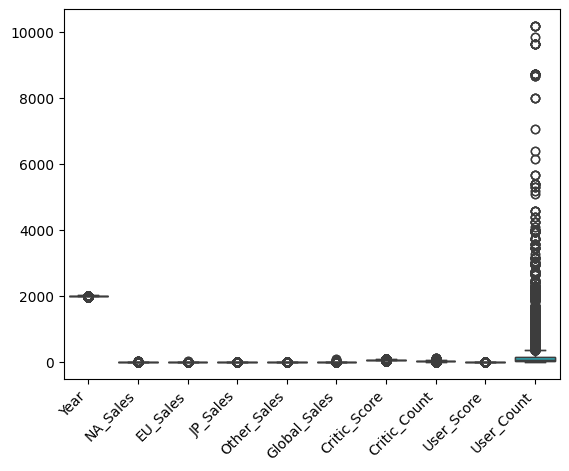

In [27]:
# Boxplot to identify outliers and extreme values
sns.boxplot(data =df);
data_viz = sns.boxplot(data = df)
data_viz.set_xticklabels(data_viz.get_xticklabels(), rotation=45, horizontalalignment='right')

Nous observons que la majorité de notre donnée est concentré vers les années 1990 et son inférieur 2020. Nous pouvons egalement remarquer des valeurs extreme voir aberrante qui semble s'eloigner de notre point de concentrer du dataset. Nous on peut en deduire que ces valeurs sont anormale et qu'il faudrat les etudiers dans la prochaine étape du modèle.

We observe that the majority of our data is concentrated around the 1990s and below 2020. We can also notice extreme or even outlier values that appear to deviate from the core focus of the dataset. Based on this, we can conclude that these values are abnormal and will need to be analyzed in the next stage of the model.

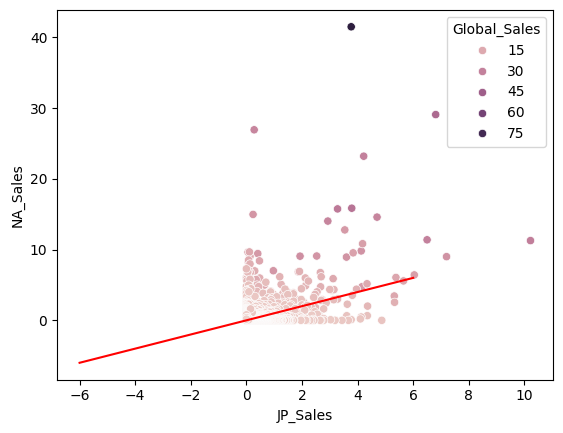

In [28]:
# Scatterplot: relationship between target variable and other variable

sns.scatterplot( x= 'JP_Sales', y= 'NA_Sales' , hue = 'Global_Sales' , data = df)
plt.plot([-6, 6], [-6, 6], color = 'red');

## Encoding

In [29]:
# Install the category_encoders library
!pip install category_encoders
import category_encoders as ce


 # Create a HashingEncoder object for specified columns with 4 hash components
encoder = ce.HashingEncoder(cols=['Name', 'Platform', 'Genre', 'Publisher'], n_components=4)

# Applying 'fit_transform' for hashing encoding on the training set
X_train_hash = encoder.fit_transform(X_train)

# Apply the same transformation to the test set
X_test_hash = encoder.transform(X_test)

# Check the shape of the transformed data
X_train_encoded = pd.DataFrame(X_train_hash, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_hash, index=X_test.index)

# Display the first few rows of the transformed datasets
print(X_train_encoded.head())
print(X_test_encoded.head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.9 MB/s eta 0:00:00
       col_0  col_1  col_2  col_3    Year  NA_Sales  EU_Sales  JP_Sales  \
15816      0      1      1      2  2016.0      0.00      0.00      0.02   
1458       0      3      1      0  1998.0      0.94      0.07      1.05   
11942      0      1      1      2  2004.0      0.07      0.02      0.00   
10810      0      3      1      0  2004.0      0.07      0.05      0.00   
10843      0      2      1      1  2000.0      0.07      0.05      0.00   

       Other_Sales  Critic_Score  Critic_Count  User_Score  User_Count  
15816         0.00     72.992157     35.711111    7.653837  385.848414  
1458          0.04     81.000000     17.000000    8.900000   89.000000  
11942         0.00     70.758799     40.787785    7.166465  386.557884  
10810         0.02     48.000000     20.000000    6.700000   13.000000  
10843         0.01     73.283019     25.043019    7.132806   71.453333  
       col_0  col_1  col_2  col_3

In [30]:
# Update encoding data shape
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(11711, 13)
(5019, 13)


La methode d'encodage la plus adapté est le hashing encoder grace à son efficacité en terme de memoire, de reduction de dimensionnalité et également adapté au modèle de dataset avec des variables à grande valeur unique.

The most appropriate encoding method is the hashing encoder due to its efficiency in terms of memory usage, dimensionality reduction, and its adaptability to datasets with high cardinality categorical variables.

## Feature engineering


Dans ce contexte là, l'objectif etait de capturer les caracteristique les plus pertinentes pour predire la variable cible continue. Après avoir encodé les variables categorielles avec le " Hashing Encoder ", la prochaine étape etait de standardiser les caracteristiques pour les mettres à la meme échelle, puis la selection des caracteristiques avec SelectKbest et le f_regressor pour conserver les variables les plus pertinentes, en reduisant le surajustement et ameliorer le modèle.

In this case, the goal was to capture the most relevant features to predict the continuous target variable. After encoding the categorical variables using the hashing encoder, the next step was to standardize the features to bring them to the same scale. Following that, we used SelectKBest with the f_regressor to keep the most relevant variables, reducing overfitting and enhancing the model's performance.


In [32]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler


# Standardizing the encoded features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Selecting the top features for linear regression
k = 4 # Number of features to select
selector = SelectKBest(f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Displaying the number of features before and after selection
print("Original number of features:", X_train_encoded.shape[1])
print("Reduced number of features:", X_train_selected.shape[1])

# Applying the same feature selection to the test set
X_test_selected = selector.transform(X_test_scaled)

# Displaying the selected feature columns
selected_columns = X_train_encoded.columns[selector.get_support()]
print("Caractéristiques sélectionnées :", selected_columns)

Original number of features: 13
Reduced number of features: 4
Caractéristiques sélectionnées : Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')


 Les caracteristiques selectionnée sont 'JP_Sales', 'Critic_Count' et 'col_0'. En raison de la nature de l'algorithme de hachage qui ne conserve pas d'informations sur les catégories d'origine. Cela peut rendre l'interprétation des données difficile, elle ne correspond pas à une seule caractéristique originale. Au contraire, chaque colonne est une combinaison compressée des différentes caractéristiques catégorielles.

The selected features are JP_Sales, Critic_Count, and col_0. Due to the nature of the hashing algorithm, which does not retain information about the original categories, this can make data interpretation challenging, as it does not correspond to a single original feature. Instead, each column represents a compressed combination of the various categorical features.FR

## Model 1: Linear Regression

In [33]:
# Testing the First Model: Linear Regression

from sklearn.linear_model import LinearRegression

# # Instantiate the model
model1 = LinearRegression()
model1.fit(X_train_selected, y_train)

# Calculate predictions on the test set
print(model1.intercept_)

#Estimation du coef estimé attribut ceof_
print(model1.coef_[0])

0.5272034839040218
0.7743523514218705


In [34]:
# Testing the First Model: Linear Regression

from sklearn.linear_model import LinearRegression

# # Instantiate the model
model1 = LinearRegression()
model1.fit(X_train_selected, y_train)

# Calculate predictions on the test set
print(model1.intercept_)

#Estimation du coef estimé attribut ceof_
print(model1.coef_[0])

0.5272034839040218
0.7743523514218705


In [35]:
# Testing the First Model: Linear Regression

from sklearn.linear_model import LinearRegression

# # Instantiate the model
model1 = LinearRegression()
model1.fit(X_train_selected, y_train)

# Calculate predictions on the test set
print(model1.intercept_)

# Display the first estimated coefficient
print(model1.coef_[0])

0.5272034839040218
0.7743523514218705


In [36]:
# Calculate prediction errors
prediction = model1.predict(X_test_selected)

# Calculate errors

erreurs = prediction - y_test

print(erreurs)

12773    0.000313
9152     0.000304
6698     0.000276
16538    0.000315
3280     0.000205
           ...   
10170    0.000310
1897     0.000195
14981    0.000311
8537     0.000308
16591    0.000317
Name: Global_Sales, Length: 5019, dtype: float64


## Interpreting Linear Regression model

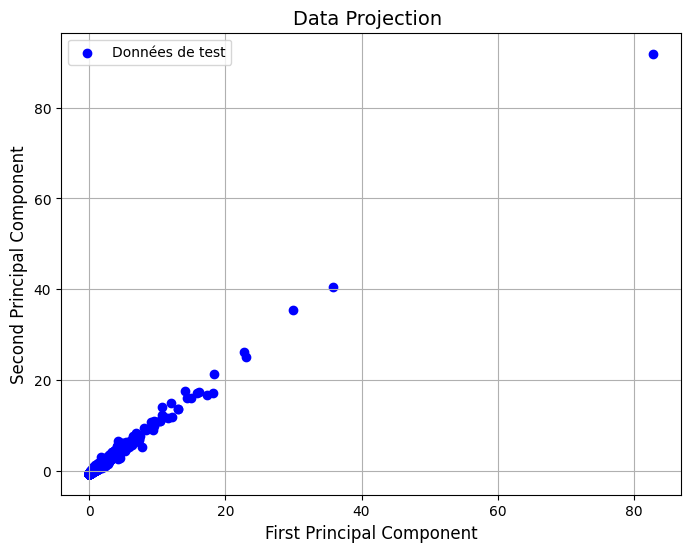

In [37]:
# Application of Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

# Reducing dimensionality to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

# Creating a new linear regression model
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Making predictions on the reduced test set
y_pred_pca = model_pca.predict(X_test_pca)


# Visualizing the data with PCA direction vectors and the regression line
plt.figure(figsize=(8,6))
plt.grid()

# Tracé des points projetés/ Plotting the projected points
plt.scatter(y_test,X_test_pca[:, 0], color='blue', label='Données de test')


#Adding labels, title, and legend
plt.title("Data Projection ", fontsize=14)
plt.xlabel("First Principal Component", fontsize=12)
plt.ylabel("Second Principal Component", fontsize=12)
plt.legend()
plt.show()

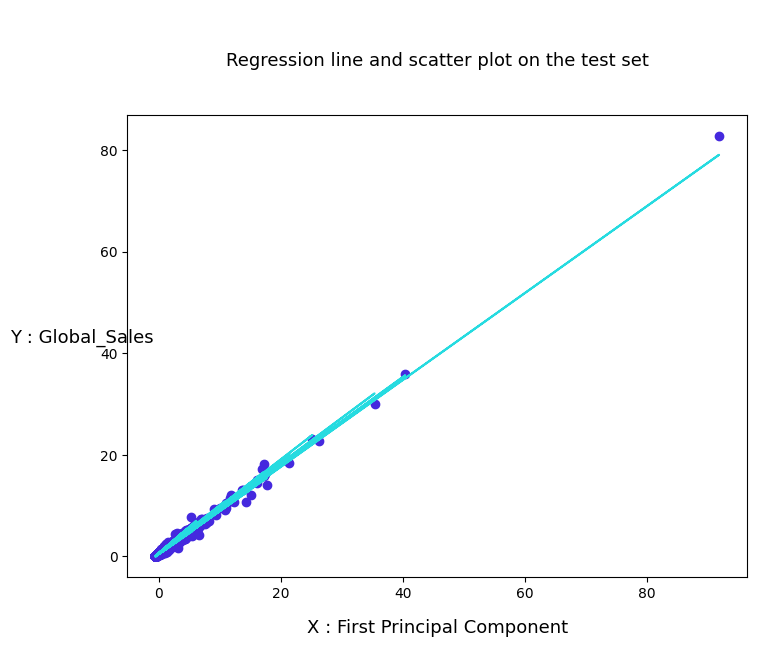

In [38]:
plt.figure(figsize=(8, 6))

## Scatter plot of test data projected onto the first principal component
plt.scatter(X_test_pca[:, 0], y_test, color='#4529de')

# Plotting the regression line based on predictions
plt.plot(X_test_pca[:, 0], y_pred_pca ,color='#26dbe0')

# Displaying the plot
plt.title("\n\nRegression line and scatter plot on the test set\n\n", fontsize=13)

plt.xlabel("X : First Principal Component",labelpad=13, fontsize=13)

plt.ylabel("Y : Global_Sales", rotation=0, labelpad=13, fontsize=13)

plt.show()

## Regression Metrics

In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluating the Model
mse_lr = mean_squared_error(y_test, prediction)
r2_lr = r2_score(y_test, prediction)
mae_lr = mean_absolute_error(y_test, prediction)

print(f"MSE (Linear Regression): {mse_lr}")
print(f"R^2 (Linear Regression): {r2_lr}")
print(f"MAE (Linear Regression): {mae_lr}")

MSE (Linear Regression): 2.738291667956214e-05
R^2 (Linear Regression): 0.9999919205801796
MAE (Linear Regression): 0.002939962607412098


### Metrics Evaluation: Linear Regression

Our Linear Regression model has achieved outstanding results based on the following metrics:

1. **Mean Squared Error (MSE)**: `2.738e-05`
   - This extremely low MSE indicates that the model's predictions are highly accurate, with very minimal error. A low MSE suggests that there are few large deviations between the predicted and actual values.

2. **R² Score**: `0.99999`
   - With an R² score close to 1, the model captures almost all the variability in the target variable, indicating an excellent fit to the data and making it a reliable predictor within this dataset.

3. **Mean Absolute Error (MAE)**: `0.00294`
   - The low MAE further emphasizes that the average prediction error is minor. This suggests that predictions generally differ from the actual values by a minimal amount, reinforcing the model's precision.

### Interpretation and Potential Next Steps

These results show that the Linear Regression model is performing exceptionally well, possibly indicating strong predictive power from the selected features. However, it may also reflect some degree of overfitting, especially if the model performs differently on new or unseen data.

Given the high level of performance, **we may consider dropping some of the selected features in the next phase** to:

- **Simplify the model** by focusing on fewer, more impactful features.
- **Enhance generalization** if overfitting is a concern, potentially making the model more robust when applied to new data.



## Model 2 : Tree Decision Regressor

In [40]:
# Importing the DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor

# Instantiating the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Training the Decision Tree model using the selected features
dt_model.fit(X_train_selected, y_train)

# Making predictions on the test set using the trained model
y_pred_dt = dt_model.predict(X_test_selected)

# Calculating the Mean Squared Error (MSE), R-squared (R^2), and Mean Absolute Error (MAE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

#The evaluation metrics for the Decision Tree model
print(f"MSE (Decision Tree): {mse_dt}")
print(f"R^2 (Decision Tree): {r2_dt}")
print(f"MAE (Decision Tree): {mae_dt}")

MSE (Decision Tree): 0.5497696110975281
R^2 (Decision Tree): 0.8377886642047343
MAE (Decision Tree): 0.05039400571760888


## Optimisation d'Hyperparametre : GRID SEARCH

In [41]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Grid Search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing Grid Search with DecisionTreeRegressor
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Displaying the best parameters and score from Grid Search
print("Best hyperparameter:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best hyperparameter: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.09261770604282824


In [42]:
# Model Performance Analysis

from sklearn.tree import DecisionTreeRegressor

model_min_samples = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 4, random_state=42)
model_min_samples.fit(X_train_selected, y_train)


print('Score train set', model_min_samples.score(X_train_selected, y_train))

print('Score test set', model_min_samples.score(X_test_selected, y_test))

Score train set 0.9824497095147197
Score test set 0.8375915202822308



#### Decision Tree Model Performance
- **Mean Squared Error (MSE)**: `0.5498`
  - The Decision Tree model's MSE is notably higher than that of the Linear Regression model. This suggests that, while the Decision Tree captures relationships within the data, it does not achieve the same level of prediction accuracy as the Linear Regression model.
  
- **R² Score**: `0.8378`
  - With an R² of around 0.84, the Decision Tree model explains about 84% of the variance in the target variable on the test data. This is a strong score, but it falls short of the near-perfect R² achieved by the Linear Regression model.

- **Mean Absolute Error (MAE)**: `0.0504`
  - The Decision Tree model’s MAE is also higher than the Linear Regression model’s. This means that, on average, the Decision Tree's predictions deviate more from the actual values compared to those from the Linear Regression model.

#### Training vs. Testing Scores
- **Training Score**: `0.9824`
- **Test Score**: `0.8376`
  - The Decision Tree model performs excellently on the training set but shows a significant drop in the test score. This difference suggests some degree of overfitting, where the model captures noise within the training data, leading to less accurate predictions on unseen data.





### Model Comparison: Decision Tree vs. Linear Regression

#### Comparison with Linear Regression
The Linear Regression model consistently outperforms the Decision Tree across all metrics. With an almost perfect R² score, a very low MSE, and minimal MAE, Linear Regression demonstrates both accuracy and generalizability. In contrast, the Decision Tree model, even with hyperparameter tuning, achieves a good fit but does not match the precision and consistency of the Linear Regression model.

#Conclusion

### Final Thoughts
To enhance the model’s efficiency and reduce redundancy, **by dropping some of the features that appear too closely aligned with the target variable**.

### Next Steps
Let's dive into the second part of our analysis, focusing on the dataset without the sales columns. By removing these columns, we aim to explore other potential relationships and insights in the data that are not directly tied to sales performance. This approach will allow us to investigate alternative predictive factors and refine our modeling strategy further.
